In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# read in the data
df = pd.read_csv('/Users/hayleeham/Documents/what-is-a-data-scientist/data/multipleChoiceResponses.csv', \
                 low_memory=False)

In [3]:
[print(item) for item in zip(df.columns, df.iloc[0])]

('Time from Start to Finish (seconds)', 'Duration (in seconds)')
('Q1', 'What is your gender? - Selected Choice')
('Q1_OTHER_TEXT', 'What is your gender? - Prefer to self-describe - Text')
('Q2', 'What is your age (# years)?')
('Q3', 'In which country do you currently reside?')
('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
('Q5', 'Which best describes your undergraduate major? - Selected Choice')
('Q6', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
('Q6_OTHER_TEXT', 'Select the title most similar to your current role (or most recent title if retired): - Other - Text')
('Q7', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
('Q7_OTHER_TEXT', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text')
('Q8', 'How many years of experience

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [4]:
def chi_square_test(table):
    '''
    Perform a chi square test on two populations
    '''
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print('Expected:', expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('\nprobability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

#     # interpret p-value
#     alpha = 1.0 - prob
#     print('\nsignificance=%.3f, p=%.3f' % (alpha, p))
#     if p <= alpha:
#         print('Dependent (reject H0)')
#     else:
#         print('Independent (fail to reject H0)')

def create_averages(df):
    '''
    Create list of averages for each task in a data scientist project
    '''
    df_dist = []
    df_dist.append(df['Q34_Part_1'].astype('float').mean())
    df_dist.append(df['Q34_Part_2'].astype('float').mean())
    df_dist.append(df['Q34_Part_3'].astype('float').mean())
    df_dist.append(df['Q34_Part_4'].astype('float').mean())
    df_dist.append(df['Q34_Part_5'].astype('float').mean())
    df_dist.append(df['Q34_Part_6'].astype('float').mean())
    
    return df_dist

def create_counts(df):
    '''
    Create list of counts for each task in a data scientist project marked important
    '''
    df_dist = []
    df_dist.append(df['Q11_Part_1'].count())
    df_dist.append(df['Q11_Part_2'].count())
    df_dist.append(df['Q11_Part_3'].count())
    df_dist.append(df['Q11_Part_4'].count())
    df_dist.append(df['Q11_Part_5'].count())
    df_dist.append(df['Q11_Part_6'].count())
    
    return df_dist

## Chi Square test for how 'yes' data scientists vs 'not' data scientists spend their time

In [5]:
# make dataframe for yes I am a DS vs no I am not a DS
df_no_students = df[df['Q6'] != 'Student']
# df_yes = df_no_students[(df_no_students['Q26'] == 'Probably yes') | (df_no_students['Q26'] == 'Definitely yes')]
# df_no = df_no_students[(df_no_students['Q26'] == 'Probably not') | (df_no_students['Q26'] == 'Definitely not')]
df_yes = df_no_students[df_no_students['Q26'] == 'Definitely yes']
df_no = df_no_students[df_no_students['Q26'] == 'Definitely not']

# average time spent for each category
df_yes_dist = create_averages(df_yes)
print('YES', df_yes_dist)

df_no_dist = create_averages(df_no)
print('NO', df_no_dist)

YES [16.246435297282755, 23.977670164110844, 12.941754102771052, 20.889830508474578, 10.015065913370998, 12.52011030400861]
NO [17.22117298578199, 22.051741706161135, 13.42733412322275, 16.56122037914692, 6.798175355450237, 10.023293838862559]


In [6]:
# call chi square test for not DS and yes DS
chi_square_test([df_yes_dist, df_no_dist])

dof=5
Expected: [[17.69638117 24.33857868 13.94295739 19.80267206  8.89019387 11.92008312]
 [15.77122712 21.69083319 12.42613084 17.64837882  7.92304739 10.62332102]]

probability=0.950, critical=11.070, stat=0.909
Independent (fail to reject H0)


In [9]:
## PCA -- drop last category and run on remaining in order to reduce dimensionality
## nice if you can reduce down to two dimensions so you can look at plots
## if you do it in a multivariate regression, you will be looking at

import numpy as np
from sklearn.decomposition import PCA
X = np.array([df_yes_dist, df_no_dist])
pca = PCA(n_components=6)
pca.fit(X)  
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)
pca.components_

[1.00000000e+00 3.61792565e-31]
[4.48410777e+00 2.69715472e-15]


array([[ 0.15370809, -0.30370302,  0.07657196, -0.68258609, -0.50727709,
        -0.39372735],
       [-0.78759567,  0.03154286,  0.45871508,  0.10741393, -0.38918801,
         0.07261911]])

## Chi Square test for how different job titles spend their time

In [7]:
# create dataframes and averages for job titles
df_ds = df[df['Q6'] == 'Data Scientist']
df_se = df[df['Q6'] == 'Software Engineer']
df_da = df[df['Q6'] == 'Data Analyst']
df_rs = df[df['Q6'] == 'Research Scientist']
df_ba = df[df['Q6'] == 'Business Analyst']
df_ra = df[df['Q6'] == 'Research Assistant']
df_de = df[df['Q6'] == 'DBA/Database Engineer']

df_ds_dist = create_averages(df_ds)
df_se_dist = create_averages(df_se)
df_da_dist = create_averages(df_da)
df_rs_dist = create_averages(df_rs)
df_ba_dist = create_averages(df_ba)
df_ra_dist = create_averages(df_ra)
df_de_dist = create_averages(df_de)

jobs = ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', \
        'Business Analyst', 'Research Assistant', 'DBA/Database Engineer']
jobs_table = [df_ds_dist, df_se_dist, df_da_dist, df_rs_dist, df_ba_dist, df_ra_dist, df_de_dist]

In [8]:
# perform pair wise chi square test
for index1, job1 in enumerate(jobs_table):
    for index2, job2 in enumerate(jobs_table):
        if index1 < index2:
            print(jobs[index1], 'VS', jobs[index2])
            chi_square_test([job1, job2])
            print('--'*45)

Data Scientist VS Software Engineer
Expected: [[17.2874131  23.26903027 13.20274267 21.79044711 10.33519052 11.302412  ]
 [16.2508262  21.87377397 12.41108055 20.48384953  9.7154724  10.6246974 ]]

probability=0.950, critical=11.070, stat=1.083
Independent (fail to reject H0)
------------------------------------------------------------------------------------------
Data Scientist VS Data Analyst
Expected: [[16.58194905 26.2022893  14.24672187 18.16946162  8.93073892 13.05607489]
 [16.53786892 26.13263523 14.20884953 18.12116137  8.90699816 13.02136766]]

probability=0.950, critical=11.070, stat=1.369
Independent (fail to reject H0)
------------------------------------------------------------------------------------------
Data Scientist VS Research Scientist
Expected: [[17.14135318 22.64165401 13.20176316 23.21156429  9.23569391 11.7552071 ]
 [16.73702745 22.10758864 12.89036345 22.66405603  9.0178448  11.47792837]]

probability=0.950, critical=11.070, stat=1.877
Independent (fail to re

## Chi Square test for counts of people saying task is an important part of job

In [9]:
df_yes_counts = create_counts(df_yes)

df_no_counts = create_counts(df_no)

In [10]:
df_yes_counts

[2591, 1857, 1389, 2246, 1330, 273]

In [11]:
df_no_counts

[416, 105, 260, 184, 96, 442]

In [12]:
chi_square_test([df_yes_counts, df_no_counts])

Expected: [[2603.07462687 1698.44776119 1427.49253731 2103.58208955 1234.44776119
   618.95522388]
 [ 403.92537313  263.55223881  221.50746269  326.41791045  191.55223881
    96.04477612]]

probability=0.950, critical=11.070, stat=1684.674
Dependent (reject H0)


In [13]:
df_ds_counts = create_counts(df_ds)
df_se_counts = create_counts(df_se)
df_da_counts = create_counts(df_da)
df_rs_counts = create_counts(df_rs)
df_ba_counts = create_counts(df_ba)
df_ra_counts = create_counts(df_ra)
df_de_counts = create_counts(df_de)

jobs = ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', \
        'Business Analyst', 'Research Assistant', 'DBA/Database Engineer']
jobs_table = [df_ds_counts, df_se_counts, df_da_counts, df_rs_counts, df_ba_counts, df_ra_counts, df_de_counts]

In [14]:
# perform pair wise chi square test
for index1, job1 in enumerate(jobs_table):
    for index2, job2 in enumerate(jobs_table):
        if index1 < index2:
            print(jobs[index1], 'VS', jobs[index2])
            chi_square_test([job1, job2])
            print('--'*45)

Data Scientist VS Software Engineer
Expected: [[2455.09088404 1900.6040102  1452.58967822 2302.98725281 1176.03762144
   746.6905533 ]
 [1095.90911596  848.3959898   648.41032178 1028.01274719  524.96237856
   333.3094467 ]]

probability=0.950, critical=11.070, stat=2304.021
Dependent (reject H0)
------------------------------------------------------------------------------------------
Data Scientist VS Data Analyst
Expected: [[3087.67995714 1910.50677279 1539.61659141 2224.57319966 1151.83286141
   119.79061759]
 [ 933.32004286  577.49322721  465.38340859  672.42680034  348.16713859
    36.20938241]]

probability=0.950, critical=11.070, stat=624.124
Dependent (reject H0)
------------------------------------------------------------------------------------------
Data Scientist VS Research Scientist
Expected: [[2601.53073924 1992.98066871 1309.5065129  2492.47457065 1485.99435825
   151.51315025]
 [ 523.46926076  401.01933129  263.4934871   501.52542935  299.00564175
    30.48684975]]

p

In [15]:
# Q11
# Analyze and understand data to influence product or business decisions
# Build and/or run a machine learning service that operationally improves my product or workflows
# Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
# Build prototypes to explore applying machine learning to new areas
# Do research that advances the state of the art of machine learning
# None of these activities are an important part of my role at work

## Make a joyplot of time spent for yes DS vs not DS

In [17]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [76]:
df_joy_yes = df_yes[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_yes['Q34_Part_1'] = pd.to_numeric(df_joy_yes['Q34_Part_1'])
df_joy_yes['Q34_Part_2'] = pd.to_numeric(df_joy_yes['Q34_Part_2'])
df_joy_yes['Q34_Part_3'] = pd.to_numeric(df_joy_yes['Q34_Part_3'])
df_joy_yes['Q34_Part_4'] = pd.to_numeric(df_joy_yes['Q34_Part_4'])
df_joy_yes['Q34_Part_5'] = pd.to_numeric(df_joy_yes['Q34_Part_5'])
df_joy_yes['Q34_Part_6'] = pd.to_numeric(df_joy_yes['Q34_Part_6'])
df_joy_yes = df_joy_yes.dropna()
df_joy_yes = df_joy_yes.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

df_joy_no = df_no[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_no['Q34_Part_1'] = pd.to_numeric(df_joy_no['Q34_Part_1'])
df_joy_no['Q34_Part_2'] = pd.to_numeric(df_joy_no['Q34_Part_2'])
df_joy_no['Q34_Part_3'] = pd.to_numeric(df_joy_no['Q34_Part_3'])
df_joy_no['Q34_Part_4'] = pd.to_numeric(df_joy_no['Q34_Part_4'])
df_joy_no['Q34_Part_5'] = pd.to_numeric(df_joy_no['Q34_Part_5'])
df_joy_no['Q34_Part_6'] = pd.to_numeric(df_joy_no['Q34_Part_6'])
df_joy_no = df_joy_no.dropna()
df_joy_no = df_joy_no.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

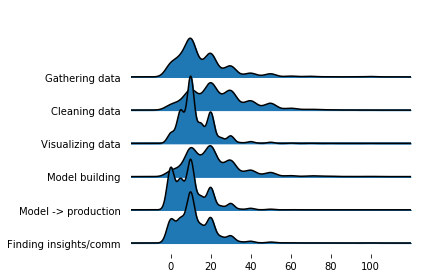

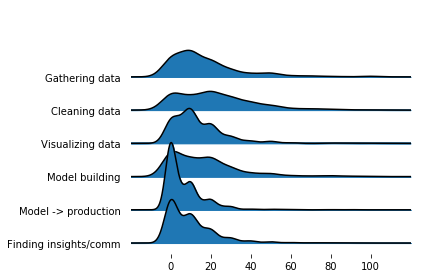

In [77]:
%matplotlib inline
fig, axes = joypy.joyplot(df_joy_yes)
fig, axes = joypy.joyplot(df_joy_no)

## Meeting with Mike
Approach like a multivariate problem
Do principal components and see if you can reduce the dimension further.
Chi square test is difference in proportions. So it would be share of events in two conditions. People falling into certain bucket.
For Q11 -- use binomial for each one -- whether or not they marked it. -- You are comparing two treatments -- but is there an expanded one for multiple categories but probably not work for being able to mark multiple.
They are responding with proportions so that is weird for the Chi square
Mahalobis distance -- converting to probability space 
-- don't average the obvservations
multivariate t-test using original vectors
PCA to understand which vectors explain most of the variance

PCA all original vectors -- no averaging
Multi t-test all original vectors -- no averaging